# Lesson 10: map

최규빈  
2023-07-25

<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day2/06_Functions, ControlFlow/2023-01-31-Lesson11.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-10-12-6wk-12.html>

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# map ($\star$)

`-` 개념: \$(f,\[x_1,x_2,,x_n\] )=\$

`-` 예제1:

In [166]:
x = [1,2,3] 
f = lambda x: x+1 
y = list(map(f,x))

(다른구현1)

In [136]:
list(map(lambda x: x+1,[1,2,3]))

(다른구현2)

In [176]:
f = lambda x: x+1 
[f(xi) for xi in [1,2,3]]

(다른구현3)

In [140]:
[(lambda x: x+1)(xi) for xi in [1,2,3]]

(다른구현4)–최악

In [178]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for xi in x:
    y.append(f(xi))

In [179]:
y

(다른구현5)–더 최악

In [143]:
y = [] 
x = [1,2,3] 
f = lambda x: x+1 
for i in range(len(x)):
    y.append(f(x[i]))

In [144]:
y

**Quiz**

$x=[1,2,3,4,5]$에 대하여 $x^2$을 수행하는 함수를 구현하라.

`-` 예제2: 문자열을 입력으로 받고 대문자이면 True, 소문자이면 False

    입력: A,B,C,a,b,c
    출력: T,T,T,F,F,F

In [210]:
x= list('ABCabc')
# x = ['A','B','C','a','b','c']
f = lambda s: s.isupper()
y = list(map(f,x))

In [211]:
x,y

`-` 예제3: 두개의 입력을 받는 함수 (map을 이용하는 것이 리스트
컴프리헨션보다 조금 편한것 같다)

In [268]:
list(map(lambda x,y: x+y, [1,2,3],[-1,-2,-3]))

(다른구현)– 리스트컴프리헨션

In [269]:
f = lambda x,y: x+y 
[f(x,y) for x,y in zip([1,2,3],[-1,-2,-3])] 

**quiz**

In [216]:
t=np.linspace(-3.14,3.14,100)
x=np.sin(t)
y=np.cos(t)

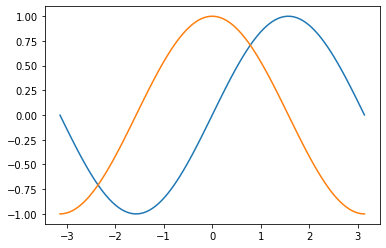

In [218]:
plt.plot(t,x)
plt.plot(t,y)

$f(x,y) = \max(x,y)$ 를 구현하여 ${\bf x}$,${\bf y}$ 각 원소에 적용하고
결과를 시각화 하라.

In [231]:
f = (lambda x,y: max(x,y))
f(3,4)

In [236]:
z= list(map(f,x,y))

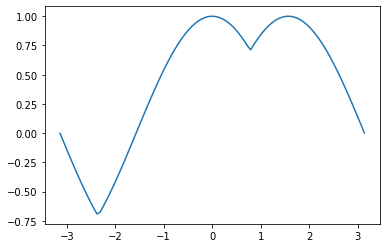

In [238]:
plt.plot(t,z)

`-` 예제4: map은 “하나의 함수에 다양한 입력”을 적용하는 경우에만
사용가능, 리스트컴프리헨션은 “다양한 함수에 다양한 입력” 지원

In [239]:
flst = [lambda x: x+1, lambda x: x+2, lambda x:x+3] 

map으로 구현시도 $\to$ 실패

In [259]:
list(map(flst,[-1,-2,-3])) # 결과가 0,0,0

리스트컴프리헨션으로 구현시도 $\to$ 성공

In [272]:
[f(x) for f,x in zip(flst,[-1,-2,-3])]

`-` 종합: map과 리스트컴프리헨션과 비교

-   map은 for문을 위한 $i$등의 인덱스를 쓰지 않지만 리스트컴프리헨션은
    필요함
-   map은 좀더 리스트컴프리헨션보다 제약적으로 사용할 수 밖에 없음.

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# 복습

`-` 아래와 같은 정보를 가지는 데이터 프레임을 생성하라.

|     | att | rep | mid | fin |
|:---:|:---:|:---:|:---:|:---:|
|  0  | 65  | 45  |  0  | 10  |
|  1  | 25  | 45  | 20  | 50  |
|  2  | 45  | 45  | 10  | 60  |
|  3  | 35  | 35  | 10  | 80  |

In [12]:
df = pd.DataFrame({'att':[65,25,45,35], 'rep':[45,45,45,35], 'mid':[0,20,10,10], 'fin':[10,50,60,80]})
df

In [15]:
df.to_csv("sample.csv",index=False)
pd.read_csv("sample.csv")

`-` 이 데이터 프레임을 “sample.csv” 파일로 저장하라.

**힌트** 아래코드를 이용

``` python
df.to_csv("sample.csv",index=False)
```

`-` 저장된 데이터 프레임을 다시 불러오고 df2로 저장하라.

**힌트**

``` python
pd.read_csv("sample.csv") 이용 
```

# 판다스: 인덱싱 1단계– 인덱싱의 4가지 컨셉

## 데이터프레임 준비

`-` 데이터준비

In [17]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/dv2022.csv')
df

`-` 앞으로는 위와 같은 df형태를 가정할 것이다. 즉 column의 이름은
문자열, row의 이름은 0부터 시작하는 정수로 가정한다.

`-` 아래와 같은 형태는 일단 생각하지 않는다.

In [21]:
pd.DataFrame({'att':[60,65,80,90],'rep':[50,100,90,100]},index=['규빈','영미','성준','혜미'])

## df의 4가지 컨셉

`-` 원소에 접근하는 4가지 방법: `.`, `[]`, `.iloc[]`, `.loc[]`

## 컨셉1: 클래스느낌

`-` 컨셉1: df는 인스턴스이다. 그리고 df.att, df.rep,df.mid, df.fin 와
같이 col이름에 대응하는 속성이 있다.

In [5]:
df.head()

In [294]:
df.fin

`-` 언제유용? col의 이름을 대충 알고 있을 경우 자동완성으로 쉽게
선택가능

## 컨셉2: 딕셔너리 + $\alpha$ 느낌

`-` 컨셉2: df는 컬럼이름이 key, 컬럼의데이터가 value가 되는 dictionary로
이해할 수 있다. 즉 아래의 dct와 같은 딕셔너리로 이해할 수 있다.

In [35]:
dct = dict(df) 
#dct

(예시) .keys() 메소드를 이용하여 컬럼들의 이름을 살펴볼 수 있음.

In [37]:
dct.keys()

In [16]:
dct.keys(), df.keys()

### `#` col indexing

`-` 예시1: dct가 가능하면 df도 가능하다.

In [40]:
df['att']
#dct['att'] 

`-` 예시2: dct가 가능하면 df도 가능하다. (2)

In [18]:
df.get('att')
#dct.get('att') 

`-` 예시3: dct에서 불가능하지만 df에서 가능한것도 있다.

In [19]:
dct.get(['att','rep'])

In [20]:
df.get(['att','rep'])

`-` 예시4: dct에서 불가능하지만 df에서 가능한것도 있다. (2)

In [21]:
dct[['att','rep']]

In [57]:
df[['att','rep']]

### `#` row indexing

`-` 예시5: dct에서 불가능하지만 df에서 가능한것도 있다. (3)

In [64]:
dct[:5] 

In [65]:
df[:5]

**Quiz**

1.  df의 마지막 열을 출력
2.  df의 마지막 행을 출력

## 컨셉3: 넘파이느낌

`-` 컨셉3: `df.iloc`은 넘파이에러이처럼 생각가능하다. 즉 아래의 arr와
같은 넘파이어레이로 생각가능하다.

In [71]:
arr = np.array(df)
#arr

### `#` row indexing

`-` 예시1: 단일레이블

In [26]:
arr[0,:] # first row 
arr[0,] 
arr[0]

In [79]:
df.iloc[0,:] # first row 
df.iloc[0,] 
df.iloc[0]

`-` 예시2: 레이블의 리스트

In [28]:
arr[[0,1,2],:] # 처음 3개의 row 선택 
arr[[0,1,2],] 
arr[[0,1,2]]

In [29]:
df.iloc[[0,1,2],:] # 처음 3개의 row 선택 
df.iloc[[0,1,2],] 
df.iloc[[0,1,2]]

`-` 예시3: 슬라이싱

In [352]:
arr[0:3,:] # 처음 3개의 row선택, 끝점포함X
arr[0:3,] 
arr[0:3]

In [353]:
df.iloc[0:3,:] # 처음 3개의 row선택, 끝점포함X
df.iloc[0:3,] 
df.iloc[0:3]

### `#` col indexing

`-` 예시1: 단일레이블

In [362]:
df.iloc[:,0] # first column 
# arr[:,0] # first column 

`-` 예시2: 레이블의 리스트

In [363]:
df.iloc[:,[0,2]] # col1, col3 을 선택
# arr[:,[0,2]] # col1, col3 을 선택

`-` 예시3: 슬라이싱

In [366]:
df.iloc[:,0:3] # 처음 3개의 col선택, 끝점포함X
#arr[:,0:3]

### `#` row + col indexing

In [98]:
df.iloc[::2,:] ## 홀수번째(=짝수인덱스)행을 출력,

**Quiz**

1.  df의 마지막 열을 출력
2.  df의 마지막 행을 출력
3.  df의 마지막 행의 마지막 열을 출력
4.  df의 짝수번째 열을 출력

## 컨셉4: 데이터프레임 느낌

`-` 컨셉4: `df.loc`은 새로운 느낌..

### `#` row indexing

`-` 예시1: 단일레이블

In [111]:
df.loc[0,:] # 첫번째 row를 선택 
df.loc[0,]
df.loc[0] 

`-` 예시2: 레이블의 리스트

In [112]:
df.loc[[0,1,2],:] # 처음 3개의 row를 선택 
df.loc[[0,1,2],]
df.loc[[0,1,2]] 

`-` 예시3: 슬라이싱 (끝점포함 O)

In [114]:
df.loc[0:3,:] # 처음 4개의 row를 선택, 끝점포함 
df.loc[0:3,]
df.loc[0:3] 

**Quiz**

2번째 row부터 5번째 row까지 출력하라. loc과 iloc으로 각각 출력해볼 것
(슬라이싱을 이용)

### `#` col indexing

`-` 예시1: 단일레이블

In [393]:
df.loc[:,'att'] 

`-` 예시2: 레이블의 리스트

In [394]:
df.loc[:,['att','mid']] 

`-` 예시3: 슬라이싱 (끝점포함 O)

In [395]:
df.loc[:,'att':'mid'] # 끝점포함 

### `#` row + col indexing

In [404]:
df.loc[::-1,'att':'mid'] # 끝점포함 

**Quiz**

출석점수의 짝수번째 row를 출력하라.

## 컨셉1~4 정리

|                  | `.` | `[]` | `.iloc` | `.loc` |
|:----------------:|:---:|:----:|:-------:|:------:|
|  row/단일레이블  |  X  |  X   |    O    |   O    |
|  col/단일레이블  |  O  |  O   |    O    |   O    |
| row/레이블리스트 |  X  |  X   |    O    |   O    |
| col/레이블리스트 |  X  |  O   |    O    |   O    |
|   row/슬라이싱   |  X  |  O   |    O    |   O    |
|   col/슬라이싱   |  X  |  X   |    O    |   O    |

`-` col 이름을 알아야하는 부담감 - `.` : 앞글자만 대충 알아도 자동완성
가능 - `[]`: 정확한 col 이름을 알아야 함 - `.loc`: 보통 정확한 col
이름을 알아야 하지만 슬라이싱 이용시 양 끝의 컬럼이름만 알면 무방 -
`.iloc`: 정확한 col 이름을 몰라도 번호로 인덱싱 가능

`-` 자주하는 실수

In [134]:
df['att'] # 가능 
# df.loc['att'] # 불가능
df.loc[:,'att'] # 가능

# 판다스: 인덱싱 2단계– 필터링(특정조건에 맞는 row를 선택)

## att \> 90 and rep \< 50

`-` 방법1: .query()를 이용

In [138]:
df.query('att>90 and rep<50')

In [139]:
df.query('(att>90)&(rep<50)') 

In [141]:
df.query('att>90 & rep<50') 

`-` 방법2: \[\], `.iloc`, `.loc`

(예비학습)

In [47]:
True&True, True&False, False&True, False&False

In [48]:
True|True, True|False, False|True, False|False

In [147]:
(df.att>90) & (df.rep<50)

예비학습 끝

In [51]:
df[(df.att > 90)&(df.rep < 50)]
df.loc[(df.att > 90)&(df.rep < 50)]
df.iloc[list((df.att > 90)&(df.rep < 50))]

`-` 방법3: \[\], `.iloc`, `.loc` // map, lambda

In [157]:
df.att > 90

In [169]:
df[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
# df[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)] # 이것은 불가능

In [497]:
df.iloc[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
df.iloc[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)]

In [496]:
df.loc[list(map(lambda x,y: (x>90)&(y<50), df.att, df.rep))]
df.loc[map(lambda x,y: (x>90)&(y<50), df.att, df.rep)]

## att \> mean(att)

`-` 방법1: .query()를 이용

In [507]:
df.query('att> att.mean()') 

`-` 방법2: \[\], `.iloc`, `.loc`

In [506]:
df[df.att > df.att.mean()]
df.loc[df.att > df.att.mean()]
df.iloc[list(df.att > df.att.mean())]

`-` 방법3: \[\], `.iloc`, `.loc` // map, lambda

In [513]:
df[list(map(lambda x: x>df.att.mean() , df.att))]
# df[map(lambda x: x>df.att.mean() , df.att)] # 이것은 불가능

In [514]:
df.iloc[list(map(lambda x: x>df.att.mean() , df.att))]
df.iloc[map(lambda x: x>df.att.mean() , df.att)]

In [515]:
df.loc[list(map(lambda x: x>df.att.mean() , df.att))]
df.loc[map(lambda x: x>df.att.mean() , df.att)]

|                  | `.` | `[]` | `.iloc` | `.loc` |
|:----------------:|:---:|:----:|:-------:|:------:|
|  row/단일레이블  |  X  |  X   |    O    |   O    |
|  col/단일레이블  |  O  |  O   |    O    |   O    |
| row/레이블리스트 |  X  |  X   |    O    |   O    |
| col/레이블리스트 |  X  |  O   |    O    |   O    |
|   row/슬라이싱   |  X  |  O   |    O    |   O    |
|   col/슬라이싱   |  X  |  X   |    O    |   O    |
|  row/bool,list   |  X  |  O   |    O    |   O    |
|   row/bool,ser   |  X  |  O   |    X    |   O    |
|   row/bool,map   |  X  |  X   |    O    |   O    |

**Quiz**

아래와 같은 데이터 프레임을 만들어라.

|     |  name   | score |
|:---:|:-------:|:-----:|
|  0  | Guebin  |  50   |
|  1  |  Jaein  |  60   |
|  2  |  Daho   |  70   |
|  3  | Seoyeon |  80   |

이름이 5글자 이상이고 점수가 55점 이상한 학생을 출력하라.

In [208]:
df=pd.DataFrame({'name':['Guebin','Jaein','Daho','Seoyeon'],'score':[50,60,70,80]})
df

In [195]:
df[list(map((lambda name,score: (len(name) >= 5)& (score>55)),df.name,df.score))]

# 판다스: 인덱싱 3단계– column의 선택 (with 실전예제)

## 데이터

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/movie.csv')
df

**Quiz** 열의 이름을 출력하여 보자.

## 기본인덱싱 (df 인덱싱공부 1단계 내용)

`-` color ~ num_voted_user 를 뽑고 + aspect_ratio 도 추가적으로
뽑고싶다. -\> loc으로는 못하겠어요..

In [5]:
df.loc[:,['color':'num_voted_users','aspect_ratio']]

`-` (팁) 복잡한 조건은 iloc으로 쓰는게 편할때가 있다. $\to$ 그런데
`df.columns` 변수들이 몇번인지 알아보기 힘듬 $\to$ 아래와 같이 하면 열의
이름을 인덱스와 함께 출력할 수 있음

In [6]:
pd.Series(df.columns)

In [7]:
list(range(13))+[26]

In [8]:
df.iloc[:,list(range(13))+[26]] 

## actor라는 단어가 포함된 column 선택

`-` 다시 열의 이름들을 확인

In [9]:
df.columns

`-` 방법1

In [10]:
df.iloc[:,list(map(lambda x : 'actor' in x, df.columns) )]

`-` 방법2

In [11]:
df.loc[:,list(map(lambda x : 'actor' in x, df.columns) )]

`-` 방법3

In [12]:
df.iloc[:,map(lambda x : 'actor' in x, df.columns)]

`-` 방법4

In [13]:
df.loc[:,map(lambda x : 'actor' in x, df.columns)]

## s로 끝나는 column 선택

`-` 방법1

In [14]:
df.iloc[:,map(lambda x: 's' == x[-1],df.columns )]

`-` 방법2

In [15]:
df.loc[:,map(lambda x: 's' == x[-1],df.columns )]

## c 혹은 d로 시작하는 column 선택

`-` 방법1

In [16]:
df.iloc[:,map(lambda x: 'c' == x[0] or 'd' == x[0] ,df.columns )]

`-` 방법2

In [17]:
df.loc[:,map(lambda x: 'c' == x[0] or 'd' == x[0] ,df.columns )]

**quiz**

1.  column이름에 `_`가 포함되어있는 열을 모두 출력하라.
2.  column이름에 `_`가 포함되어있는 열은 모두 몇개인가?

# 판다스: 새로운 열의 할당 1단계

## 방법1: concat

In [122]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [123]:
_df = pd.DataFrame({'c':[3,4,5]}) 
_df

In [124]:
pd.concat([df,_df],axis=1)

## 방법2: 4가지 컨셉에 따른 할당

### `#` 컨셉1: 불가능

In [125]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [126]:
df.c = pd.Series([1,2,3]) 
df

/home/cgb2/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.

### `#` 컨셉2: 가능

(예시1)

In [127]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [128]:
df['c']=[3,4,5]
df

(예시2)

In [129]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [130]:
df[['c','d']]=np.array([[3,4,5],[4,5,6]]).T # 굳이.. 
df

(예시3)

In [131]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [132]:
df['c'],df['d']=[3,4,5],[4,5,6]
df

### `#` 컨셉3: 불가능

(예시1)

In [133]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [134]:
df.iloc[:,2] = [3,4,5] 
df

### `#` 컨셉4: 가능

(예시1)

In [135]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [136]:
df.loc[:,'c'] = [3,4,5] 
df

(예시2)

In [137]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [138]:
df.loc[:,['c','d']] = np.array([[3,4,5],[4,5,6]]).T # 이거 솔직히 되는지 몰랐어요.. 
df

(예시3)

In [139]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [140]:
df.loc[:,'c'],df.loc[:,'d'] = [3,4,5],[4,5,6] 
df

## 방법3: `.assign`으로 할당 ($\star$) – 제 최애

In [141]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [142]:
df.assign(c=[3,4,5])

In [143]:
df.assign(c=[3,4,5],d=[4,5,6])

In [144]:
df.assign(c=[3,4,5]).assign(d=[4,5,6])

## 방법4: `.eval`을 이용한 할당

In [145]:
df = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df

In [146]:
df.eval('c=[3,4,5]')

In [147]:
df.eval('c=[3,4,5]').eval('d=[4,5,6]')

## 연습해보기

### `#` 데이터프레임 생성

In [111]:
df=pd.DataFrame({'x':np.random.randn(1000),'y':np.random.randn(1000)})
df

### `#` 새로운열 `r`을 생성하고 $r=\sqrt{x^2 + y^2}$를 계산

`-` 방법1: 브로드캐스팅

In [112]:
df.assign(r=np.sqrt(df.x**2 + df.y**2))

`-` 방법2: (**quiz**) lambda + map을 이용한 개별원소 계산

`-` 방법3: eval

In [114]:
df.eval('r=sqrt(x**2+y**2)')

# 판다스: 새로운 열의 할당 2단계 (연쇄할당)

## 모티브

`-` 원본데이터를 가급적 손상시키지 않으면서 데이터를 변형하고 싶음.

In [3]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df

복사본 생성

In [4]:
df2 = df 
df2

In [5]:
df2['C'] = (df2.A+ df2.B)/2
df2

In [6]:
df2['D']= (df2.C - np.mean(df2.C))/np.std(df2.C) 
df2

In [7]:
df # 니가 왜 거기서 나와??

## 해결책1: df.copy()이용, .eval()이용

`-` 올바른코드1

In [8]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df2 = df.copy() 
df2['C'] = (df2.A+ df2.B)/2
df2['D']= (df2.C - np.mean(df2.C))/np.std(df2.C) 

In [9]:
df2

In [10]:
df

`-` 올바른코드2

In [30]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
mean = np.mean 
std = np.std 
df.eval('C=(A+B)/2').eval('D=(C-@mean(C))/@std(C)')

-   어디까지 eval expression 안에서 지원되는지 명확하지 않고
-   외부에 함수를 선언하고 eval expression 안에 (**를?**) 붙이는게 좀
    귀찮음

`-` 올바른코드3 (assign) –\> 실패

In [31]:
df = pd.DataFrame({'A':range(0,5),'B':range(1,6)})
df.assign(C= (df.A+df.B)/2) 

In [32]:
df.assign(C= (df.A+df.B)/2).assign(D= (df.C- np.mean(df.C))/np.std(df.C))

아래와 같이 고쳐야함

In [39]:
_df = df.assign(C= (df.A+df.B)/2)
_df.assign(D= (_df.C- np.mean(_df.C))/np.std(_df.C))

-   이건 우리의 철학이랑 안맞음..

## 해결책2: assign을 이용한 연쇄할당

실패한코드는 아래와 같다.

In [44]:
df.assign(C= (df.A+df.B)/2).assign(D= (df.C- np.mean(df.C))/np.std(df.C))

두번째 assign에서 표현된 df.C 에서, df가 `current df` (=
`df.assign(C= (df.A+df.B)/2)` 까지 연산된 상태) 를 의미하도록 만들고
싶다. $\to$ 아래와 같이 `lambda df:` 를 추가하면 된다.

In [49]:
df.assign(C= (df.A+df.B)/2).assign(D= lambda df: (df.C- np.mean(df.C))/np.std(df.C))

`-` 연쇄할당

In [55]:
df.assign(C = (df.A+df.B)/2).assign(D = lambda df: df.C +2).assign(E = lambda df: df.D - 2)

# Quiz

다음과 같은 데이터프레임을 불러온 뒤 물음에 답하라

In [518]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/dv2022.csv')
df

`(1)` 기말고사 성적이 중간고사 성적보다 향상된 학생들을 출력하라. 즉 mid
\< fin 인 학생들을 출력하라. (다양한 방법으로 연습할 것, 제출은 한 가지
방법으로 구현해도 감점없음)

In [521]:
# 구현결과가 아래와 같아야 한다. 

`(2)` 기말고사 성적이 중간고사 성적보다 향상된 학생들의 출석과 레포트
점수를 출력하라.

In [523]:
# 구현결과가 아래와 같아야 한다. 

In [64]:
df = pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5],'c':[3,4,5,6],'d':[4,5,6,7]})
df

## `2`.

아래의 결과를 관찰하고 drop의 기능을 유추하라.

(예시1)

In [65]:
df.drop(columns='a')

(예시2)

In [66]:
df.drop(columns=['a','b'])

(예시3)

In [67]:
df.drop(index=0)

(예시4)

In [71]:
df.drop(index=range(2,4))

문제: `df` 에서 a,c열을 삭제하고 첫행을 삭제하라.

In [78]:
#출력결과는 아래와 같아야 한다. 

# FIFA23 데이터분석

## FIFA23 data

`-` FIFA23라는 축구게임이 있음

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어
있음

`-` 선수들 능력치에 대한 데이터셋은 캐글에 공개되어 있음 -
https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv

## 데이터살펴보기

`-` 일단 살펴보기

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head()

트랜스포즈하여 보는 것이 편할때도 있음

In [3]:
df.T

`-` column이름조사

In [4]:
df.keys()

-   이름에 space가 있어서 좀 거슬림

**Quiz** column이름에 space를 제거할 수 있을까?

`-` 각 column 별로 자료형조사

In [7]:
df.ID

In [9]:
df.ID.dtype

**Quiz** 각 컬럼별로 자료형을 조사할 수 있을까?

`-` 결측치조사

In [11]:
df.Club 

-   무소속인 선수도 있지 않나?

(예비학습)

In [17]:
pd.Series([1,2,None,2,3]).isna()

예비학습 끝

In [18]:
df.Club.isna().sum() # 무소속인 선수는 211명 

**Quiz** 각 컬럼별로 결측시의 수를 조사할 수 있을까?

**Quiz** 각 col별로 자료형과 결측치의 수를 조사한 표를 얻을 수 있을까?

In [7]:
# 이런식으로!!

**Quiz** 열의선택: 결측치가 10000개 이상인 열을 보고싶다면? (먼가 문제가
있는 열 같은데?)

In [8]:
df.loc[:,[df[key].isna().sum()>10000 for key in df.keys()]]

`-` .info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

## 데이터정리하기

`-` 칼럼이름변경

In [19]:
df.set_axis(pd.Index(map(lambda x: x.replace(' ','_'), df.columns)), axis=1)

`-` 결측치제거

In [20]:
df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()

`-` Height, Weight의 자료형을 float형으로 수정하기

In [21]:
df.assign(
    Height= list(map(lambda x: float(x[:-2]), df.Height)),
    Weight= list(map(lambda x: float(x[:-2]), df.Weight))
)

`-` Release Clause의 자료형을 float으로 수정하기

In [22]:
df['Release Clause']

In [23]:
_f = lambda x: float(x[1:-1])*1000 if x[-1]=='K' else float(x[1:-1])*1000000

In [24]:
_f('€157M')

In [25]:
_f('€131K')

(시도1–실패)

In [26]:
list(map(_f,df['Release Clause']))

(시도1이 실패한 이유)

In [27]:
df['Release Clause'].isna().sum() # 이 column에는 1151개의 결측치가 존재

(nan에 대한 예비학습)

In [28]:
df.loc[df['Release Clause'].isna(), 'Release Clause']

In [29]:
df.loc[18, 'Release Clause']

In [30]:
pd.isna(df.loc[18, 'Release Clause'])

In [31]:
type(df.loc[18, 'Release Clause'])

In [32]:
df.loc[18, 'Release Clause'][-1]

(시도2–성공)

In [33]:
df.rename(columns={'Release Clause':'ReleaseClause'})\
.assign(ReleaseClause = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df['Release Clause'])))\
.rename(columns={'ReleaseClause':'Release Clause'})

(시도3–성공) 그냥 결측치를 제거하고 변형해도 무방..

In [34]:
df2 = df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()
df2['Release Clause'] = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df2['Release Clause']))
df2

> 분석의 편의를 위하여 (1) colnames를 변경하고 (2) 결측치를 제거하고 (3)
> 몇 가지 전 처리를 추가로 진행한 뒤 df2를 만들어서 분석하는게 좋음